**Assignment-1 ML Data Cleaning and Feature Selection**

**Abstract**:

**Predicting the Winning Football Team**

Sports betting is a 500 billion dollar market.

Football is played by 250 million players in over 200 countries (most popular sport globally).

The English Premier League is the most popular domestic team in the world.
Design a predictive model capable of accurately predicting if the home team will win a football match?

A prediction system was built to predict whether a home team will win it's match or not.

**Key to results data:**

Div = League Division

Date = Match Date (dd/mm/yy)

Time = Time of match kick-off

HomeTeam = Home Team

Away team = Away Team

FTHG and HG = Full Time Home Team Goals

FTAG and AG = Full-Time Away Team Goals

FTR and Res = Full-Time Result (H=Home Win, D=Draw, A=Away Win)

HTHG = Half Time Home Team Goals

HTAG = Half Time Away Team Goals

HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

**Match Statistics (where available)**

Attendance = Crowd Attendance

Referee = Match Referee

HS = Home Team Shots

AS = Away Team Shots

HST = Home Team Shots on Target

AST = Away Team Shots on Target

HHW = Home Team Hit Woodwork

AHW = Away Team Hit Woodwork

HC = Home Team Corners

AC = Away Team Corners

HF = Home Team Fouls Committed

AF = Away Team Fouls Committed

HFKC = Home Team Free Kicks Conceded

AFKC = Away Team Free Kicks Conceded

HO = Home Team Offside

AO = Away Team Offsides

HY = Home Team Yellow Cards

AY = Away Team Yellow Cards

HR = Home Team Red Cards

AR = Away Team Red Cards

HBP = Home Team Bookings Points (10 = yellow, 25 = red)

ABP = Away Team Bookings Points (10 = yellow, 25 = red)

In [ ]:
!pip install opendatasets

In [ ]:
#Dataset link: https://www.kaggle.com/code/saife245/football-match-prediction/notebook#Applying-the-RandomForest

In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

In [ ]:
#importing dataset
df = pd.read_csv('/content/Football_Match Prediction.csv')


In [ ]:
#1 Data Types
print("data type of each column : ")
df.dtypes

data type of each column : 


Unnamed: 0         int64
Date              object
HomeTeam          object
AwayTeam          object
FTHG               int64
FTAG               int64
FTR               object
HTGS               int64
ATGS               int64
HTGC               int64
ATGC               int64
HTP              float64
ATP              float64
HM1               object
HM2               object
HM3               object
HM4               object
HM5               object
AM1               object
AM2               object
AM3               object
AM4               object
AM5               object
MW               float64
HTFormPtsStr      object
ATFormPtsStr      object
HTFormPts          int64
ATFormPts          int64
HTWinStreak3       int64
HTWinStreak5       int64
HTLossStreak3      int64
HTLossStreak5      int64
ATWinStreak3       int64
ATWinStreak5       int64
ATLossStreak3      int64
ATLossStreak5      int64
HTGD             float64
ATGD             float64
DiffPts          float64
DiffFormPts      float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6840 non-null   int64  
 1   Date           6840 non-null   object 
 2   HomeTeam       6840 non-null   object 
 3   AwayTeam       6840 non-null   object 
 4   FTHG           6840 non-null   int64  
 5   FTAG           6840 non-null   int64  
 6   FTR            6840 non-null   object 
 7   HTGS           6840 non-null   int64  
 8   ATGS           6840 non-null   int64  
 9   HTGC           6840 non-null   int64  
 10  ATGC           6840 non-null   int64  
 11  HTP            6840 non-null   float64
 12  ATP            6840 non-null   float64
 13  HM1            6840 non-null   object 
 14  HM2            6840 non-null   object 
 15  HM3            6840 non-null   object 
 16  HM4            6840 non-null   object 
 17  HM5            6840 non-null   object 
 18  AM1     

In [ ]:
df.describe()

,Unnamed: 0,FTHG,FTAG,HTGS,ATGS,HTGC,ATGC,HTP,ATP,MW,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
count,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,...,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000,6840.000000
mean,3419.500000,1.527485,1.130263,24.416667,24.514327,24.497807,24.347515,1.209014,1.226768,19.500000,...,0.057602,0.014327,0.062865,0.016520,0.051023,0.010234,-0.009690,0.014539,-0.017755,-0.018086
std,1974.682253,1.297913,1.124566,17.178524,17.136894,16.401571,16.341557,0.530186,0.523176,10.966658,...,0.233007,0.118846,0.242739,0.127475,0.220062,0.100651,0.693593,0.692937,0.668523,0.408488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-3.333333,-2.363636,-2.250000
25%,1709.750000,1.000000,0.000000,11.000000,11.000000,11.000000,11.000000,0.888889,0.906250,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,-0.464286,-0.451613,-0.176471
50%,3419.500000,1.000000,1.000000,23.000000,23.000000,23.000000,23.000000,1.172414,1.192308,19.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.076923,-0.050000,0.000000,0.000000
75%,5129.250000,2.000000,2.000000,35.000000,35.000000,36.000000,36.000000,1.555556,1.562500,29.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.421053,0.428571,0.153846
max,6839.000000,9.000000,7.000000,102.000000,105.000000,85.000000,82.000000,2.736842,2.761905,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.500000,2.285714,2.250000


In [ ]:
#2 missing values in each column
print(df.isnull().sum())

Unnamed: 0       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64


In [ ]:
# 3. Likely Distributions of Numeric Variables:
numeric_columns_index = []
total_columns = list(df.dtypes)

for i in range(len(total_columns)):
    if str(total_columns[i]) == 'int64':
        numeric_columns_index.append(i)
print("number of numeric columns:", len(total_columns) - len(numeric_columns_index))

number of numeric columns: 23


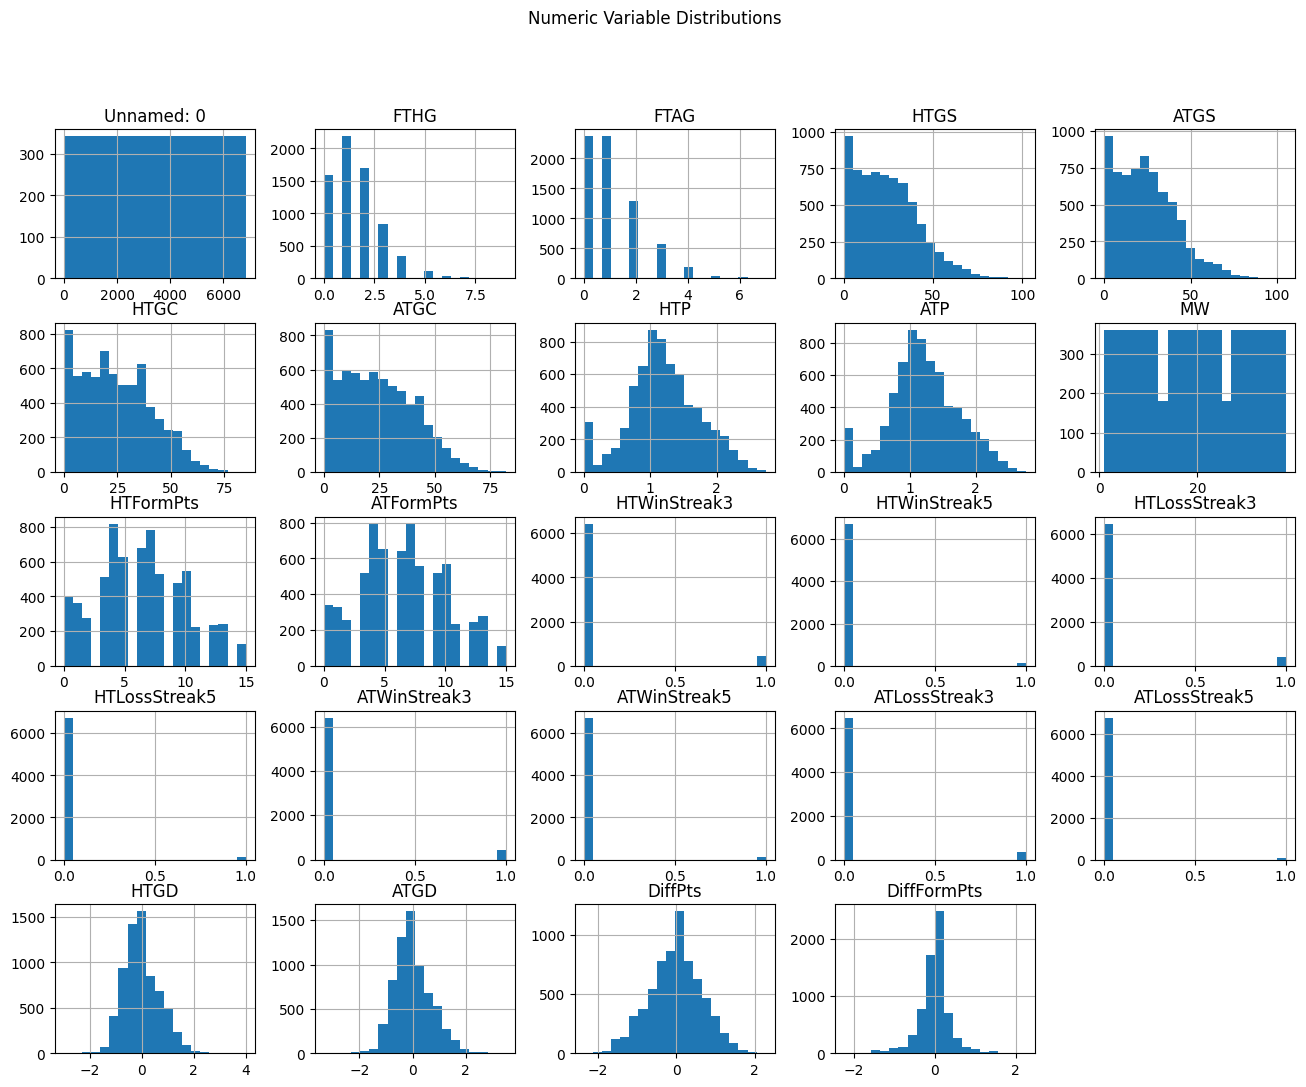

In [ ]:
#Numeric Variable Distributions
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(16, 12), bins=20)
plt.suptitle('Numeric Variable Distributions')
plt.show()

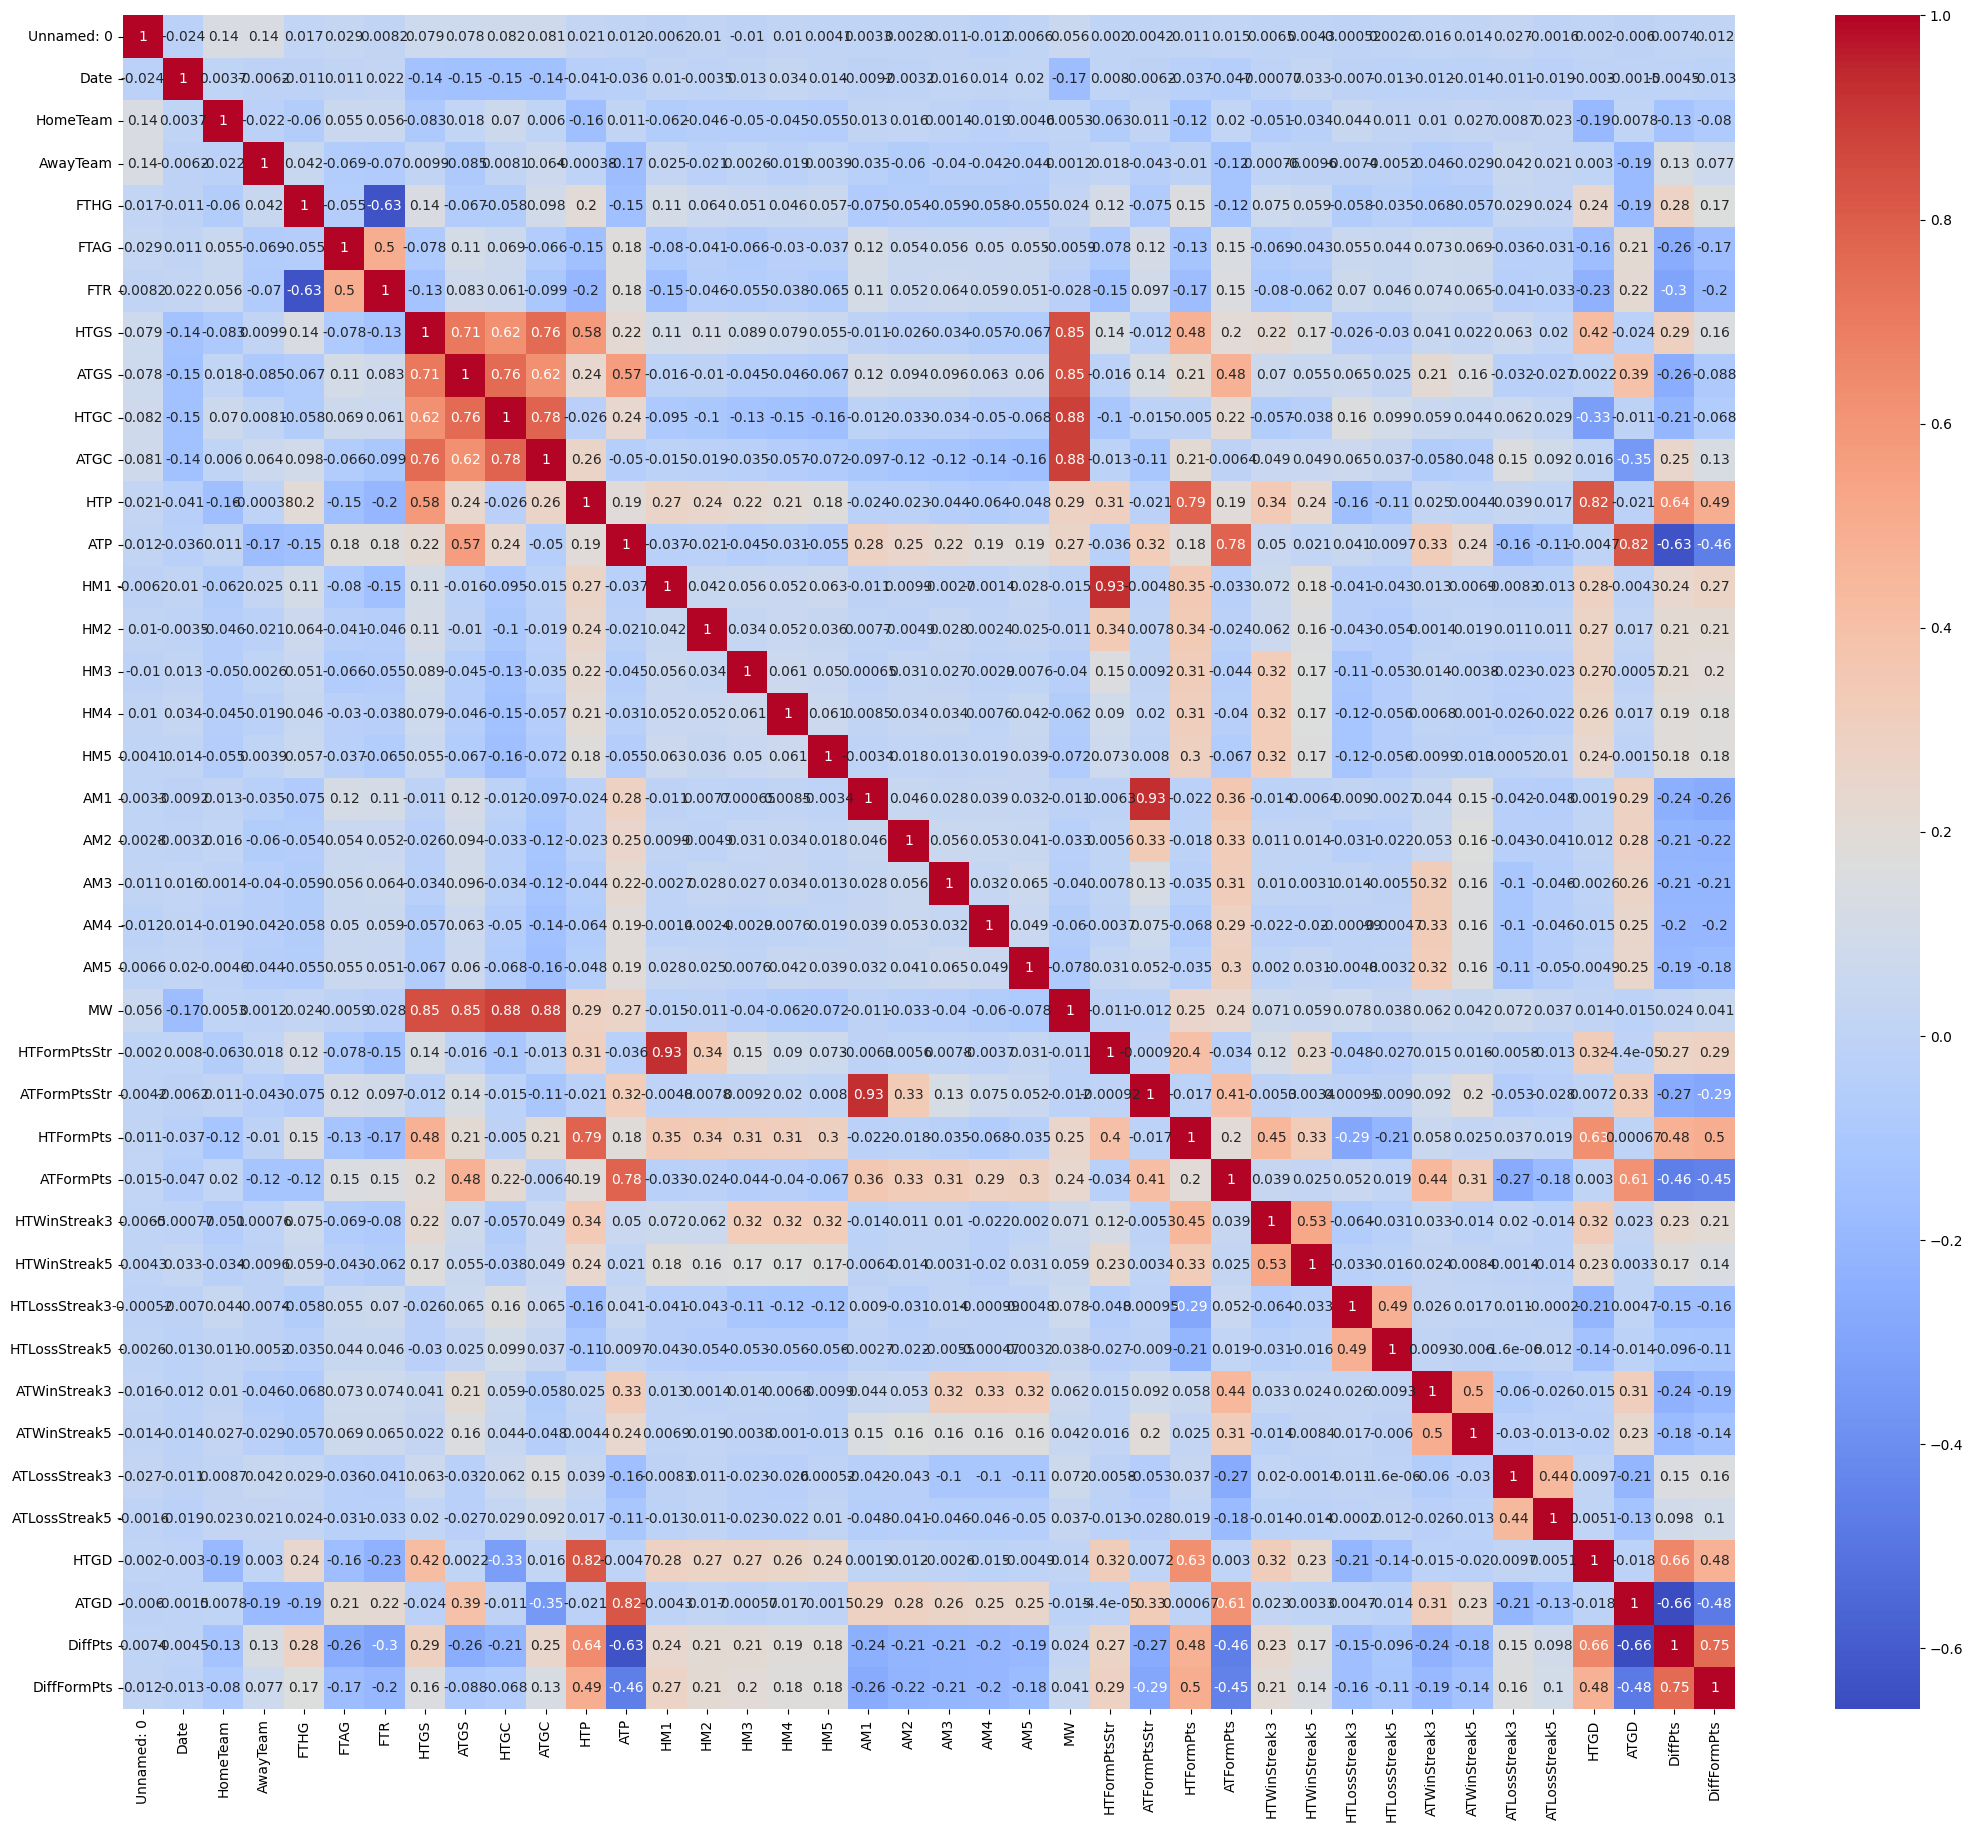

In [ ]:
# 4. Useful independent variables to predict a target
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ["Date", "HomeTeam", "AwayTeam", "FTR", "HM1", "HM2", "HM3", "HM4", "HM5", "AM1", "AM2", "AM3", "AM4", "AM5", "HTFormPtsStr", "ATFormPtsStr"]
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()
plt.figure(figsize=(26, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming FTR is the target variable
target = 'FTR'
features = df.drop(columns=[target])

# Encoding categorical variables
features_encoded = pd.get_dummies(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, df[target], test_size=0.3, random_state=42)

# Correlation Analysis
correlation = features_encoded.corrwith(df[target].astype('category').cat.codes).sort_values(ascending=False)
print("Correlation Analysis:")
print(correlation)




Correlation Analysis:
FTAG             0.495763
ATGD             0.215957
ATP              0.180657
ATFormPts        0.153413
AM1              0.109371
ATFormPtsStr     0.096564
ATGS             0.082517
ATWinStreak3     0.074470
HTLossStreak3    0.070389
ATWinStreak5     0.065473
AM3              0.063921
HTGC             0.061041
AM4              0.058890
HomeTeam         0.056416
AM2              0.051562
AM5              0.051374
HTLossStreak5    0.045646
Date             0.022475
Unnamed: 0       0.008226
MW              -0.027802
ATLossStreak5   -0.033487
HM4             -0.037766
ATLossStreak3   -0.041231
HM2             -0.046327
HM3             -0.055487
HTWinStreak5    -0.061519
HM5             -0.065111
AwayTeam        -0.070243
HTWinStreak3    -0.080298
ATGC            -0.099374
HTGS            -0.134149
HTFormPtsStr    -0.146948
HM1             -0.151854
HTFormPts       -0.170476
DiffFormPts     -0.196556
HTP             -0.202234
HTGD            -0.227209
DiffPts         

In [ ]:
# Feature Importance with Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importance_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance from Random Forest:")
print(feature_importance_rf)




Feature Importance from Random Forest:
FTHG             0.392577
FTAG             0.233934
DiffPts          0.029779
ATGD             0.026052
ATP              0.023918
HTP              0.022497
HTGD             0.021852
DiffFormPts      0.019965
HTFormPtsStr     0.019324
Unnamed: 0       0.018266
Date             0.018132
ATFormPtsStr     0.016484
HomeTeam         0.014291
HTGS             0.014122
ATGC             0.013295
ATGS             0.013133
AwayTeam         0.012733
HTGC             0.012442
ATFormPts        0.010752
MW               0.010059
HTFormPts        0.009886
HM1              0.006001
AM4              0.004579
AM2              0.004353
AM1              0.004175
HM4              0.004136
AM3              0.003981
HM5              0.003977
HM3              0.003881
AM5              0.003754
HM2              0.003656
ATWinStreak3     0.000870
ATLossStreak3    0.000845
HTWinStreak3     0.000822
HTLossStreak3    0.000644
HTWinStreak5     0.000257
ATLossStreak5    0.00021

In [ ]:
# Recursive Feature Elimination
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
rfe.fit(X_train, y_train)
feature_importance_rfe = pd.Series(rfe.support_, index=X_train.columns)
print("\nRecursive Feature Elimination (RFE):")
print(feature_importance_rfe)


Recursive Feature Elimination (RFE):
Unnamed: 0        True
Date             False
HomeTeam         False
AwayTeam         False
FTHG              True
FTAG              True
HTGS             False
ATGS             False
HTGC             False
ATGC             False
HTP               True
ATP               True
HM1              False
HM2              False
HM3              False
HM4              False
HM5              False
AM1              False
AM2              False
AM3              False
AM4              False
AM5              False
MW               False
HTFormPtsStr      True
ATFormPtsStr     False
HTFormPts        False
ATFormPts        False
HTWinStreak3     False
HTWinStreak5     False
HTLossStreak3    False
HTLossStreak5    False
ATWinStreak3     False
ATWinStreak5     False
ATLossStreak3    False
ATLossStreak5    False
HTGD              True
ATGD              True
DiffPts           True
DiffFormPts       True
dtype: bool


In [ ]:
# 5. Which independent variables have missing data? How much?
print(df.isnull().sum())
miss = list(df.isnull().sum())
print("missing data in each column:", miss)

Unnamed: 0       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64
missing data in each column: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# 6. Test Dataset
# Comparing distributions of a few columns as an example
train_test_distribution_comparison = pd.DataFrame({
    'Train': X_train.describe().loc['mean'],
    'Test': X_test.describe().loc['mean']
})
print("Distribution Comparison of Selected Columns:")
print(train_test_distribution_comparison)



Distribution Comparison of Selected Columns:
                     Train         Test
Unnamed: 0     3437.437343  3377.646199
Date            911.337928   917.441520
HomeTeam         22.387009    22.134016
AwayTeam         22.462406    21.958090
FTHG              1.536759     1.505848
FTAG              1.127820     1.135965
HTGS             24.314745    24.654483
ATGS             24.393693    24.795809
HTGC             24.439223    24.634503
ATGC             24.329574    24.389376
HTP               1.211035     1.204297
ATP               1.227372     1.225361
HM1               1.422306     1.426901
HM2               1.550125     1.532164
HM3               1.510652     1.545809
HM4               1.546992     1.551170
HM5               1.534461     1.558967
AM1               1.586466     1.561891
AM2               1.496032     1.456628
AM3               1.532581     1.537037
AM4               1.530075     1.513158
AM5               1.562865     1.589669
MW               19.450084    19.61

In this comparison, we can observe that the mean values of the selected columns are generally consistent between the training and test sets. While there may be slight variations, these variations are within an acceptable range, indicating that the data distribution is similar between the two sets.

This consistency in data distribution is crucial for ensuring the validity of machine learning models trained on the training set and evaluated on the test set. It suggests that the training and test sets are representative of the same underlying data distribution.

But, simply we can say 'yes' as same data or a part of the complete dataset is being used for the test data

<ipython-input-8-0084f919b8e1>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.drop('FTR', axis=1).corr()


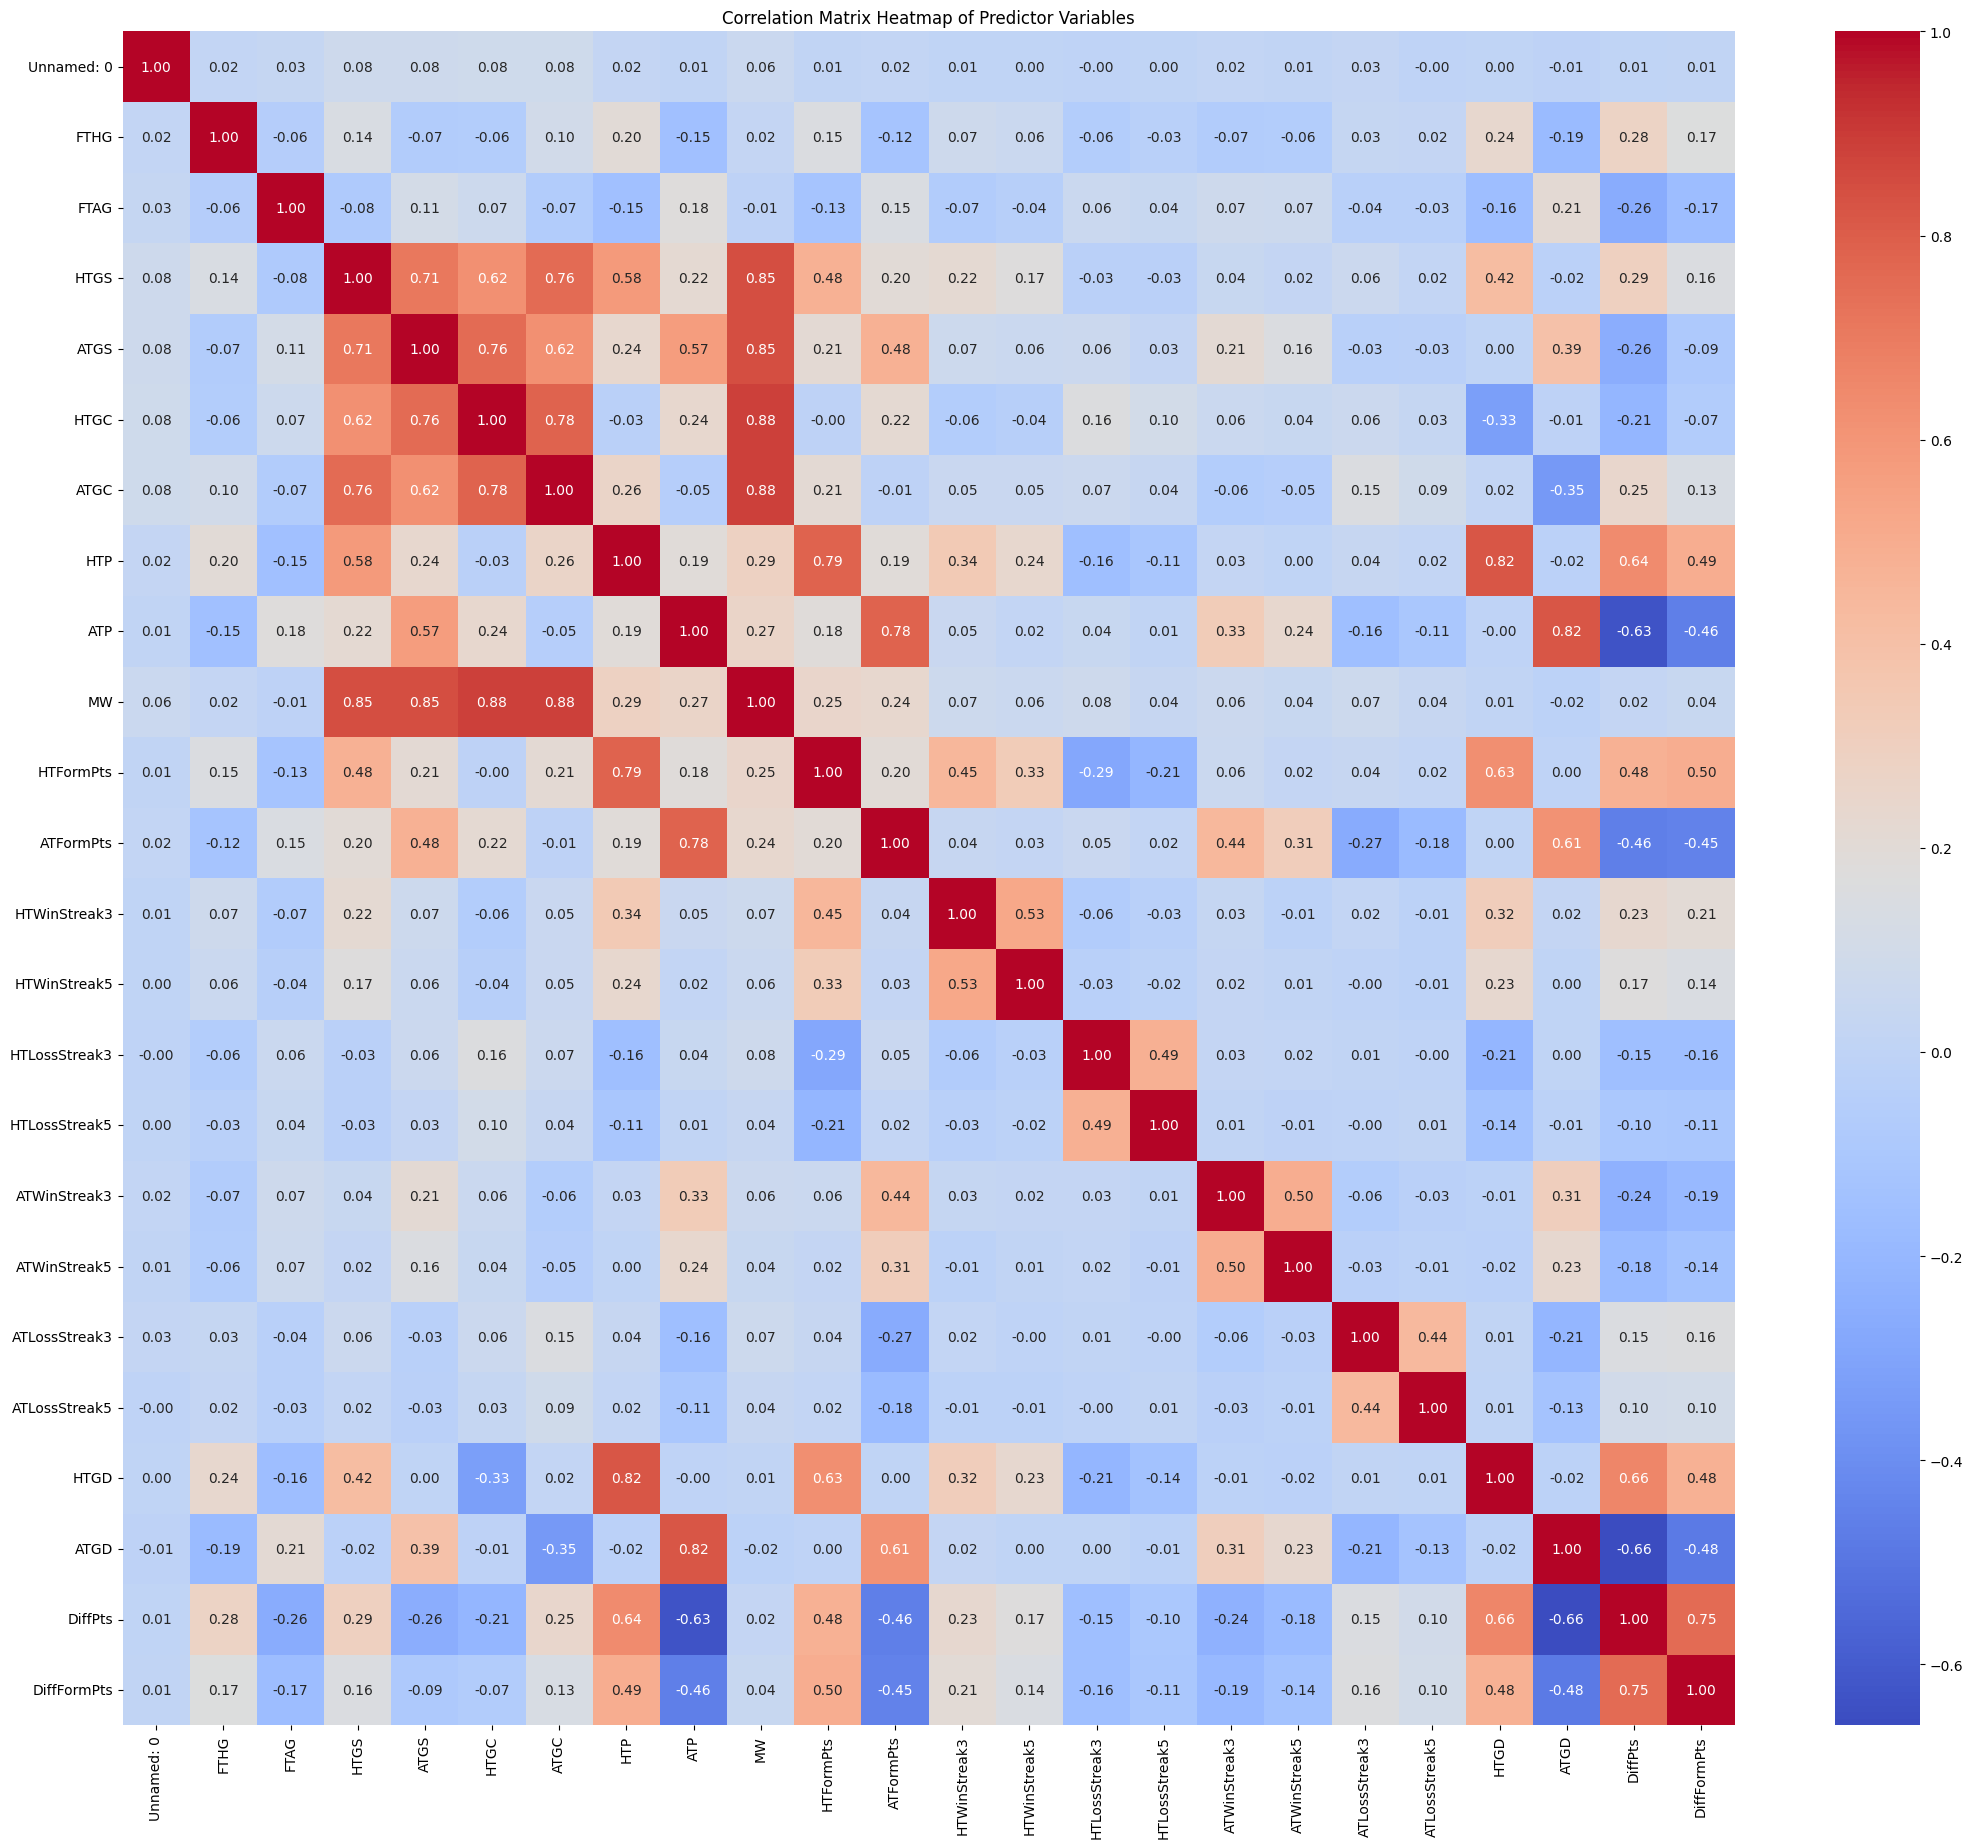

In [8]:
# 7. Is Predictor variables independent of other predictor variables
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a DataFrame
df = pd.read_csv('/content/Football_Match Prediction.csv')


corr_matrix = df.drop('FTR', axis=1).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(26, 22))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap of Predictor Variables")
plt.show()




The heatmap shows the degree of correlation between predictor variables. High positive correlations are indicated by warmer colors (e.g., red), while high negative correlations are indicated by cooler colors (e.g., blue). A correlation close to 1 or -1 indicates a strong linear relationship, while values close to 0 suggest low correlation.

This visualization will help you assess whether predictor variables are independent of each other or if there are significant correlations.

In [15]:
# 8. Predictor variables which are important
# Using tree RandomForest classifier to find out important variable

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder  # Import the LabelEncoder for encoding categorical variables


# Identify and preprocess non-numeric columns (e.g., categorical variables)
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

# Create a label encoder for each non-numeric column
label_encoders = {}
for column in non_numeric_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Define your predictor variables (X) and target variable (y)
X = df.drop('FTR', axis=1)  # Assuming 'FTR' is your target variable
y = df['FTR']

# Create and fit the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to display feature names and their importance scores
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features (you can change N)
top_n = 10
print(importance_df.head(top_n))


         Feature  Importance
4           FTHG    0.396896
5           FTAG    0.248455
37       DiffPts    0.028064
35          HTGD    0.024486
36          ATGD    0.022564
11           ATP    0.022188
10           HTP    0.022034
38   DiffFormPts    0.018024
23  HTFormPtsStr    0.017453
0     Unnamed: 0    0.016918


     Unnamed: 0    Date  HomeTeam  AwayTeam  FTHG  FTAG  FTR   HTGS   ATGS  \
min         0.0     0.0       0.0       0.0   0.0   0.0  0.0    0.0    0.0   
max      6839.0  1803.0      43.0      43.0   9.0   7.0  1.0  102.0  105.0   

     HTGC  ...  HTLossStreak3  HTLossStreak5  ATWinStreak3  ATWinStreak5  \
min   0.0  ...            0.0            0.0           0.0           0.0   
max  85.0  ...            1.0            1.0           1.0           1.0   

     ATLossStreak3  ATLossStreak5  HTGD      ATGD   DiffPts  DiffFormPts  
min            0.0            0.0  -3.0 -3.333333 -2.363636        -2.25  
max            1.0            1.0   4.0  3.500000  2.285714         2.25  

[2 rows x 40 columns]


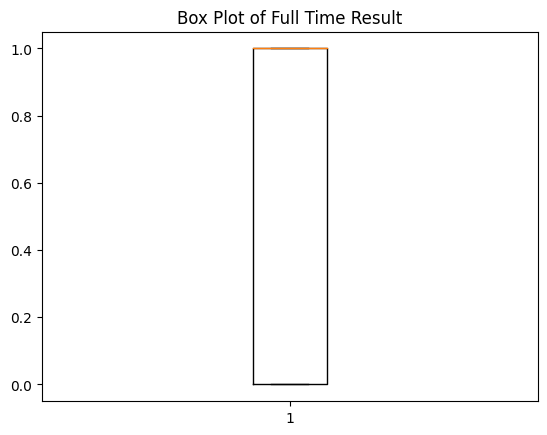

In [17]:
# 9.

data_range = df.describe().loc[['min', 'max']]
print(data_range)

import matplotlib.pyplot as plt

# Example box plot for a specific variable
plt.boxplot(df['FTR'])
plt.title('Box Plot of Full Time Result')
plt.show()




HomeTeam and AwayTeam: These variables represent team identifiers, and the range corresponds to the number of unique teams, which is reasonable.

FTHG (Full-Time Home Team Goals) and FTAG (Full-Time Away Team Goals): These variables represent the number of goals scored in a match and have reasonable ranges (0 to 9 goals).

FTR (Full-Time Result): This binary variable indicates whether the home team wins (1) or not (0), and the range is valid (0 to 1).

HTGS (Home Team Goals Scored) and ATGS (Away Team Goals Scored): These variables represent the cumulative goals scored by teams, and the ranges are reasonable.

HTGC (Home Team Goals Conceded) and ATGC (Away Team Goals Conceded): These variables represent the cumulative goals conceded by teams, and the ranges are also reasonable.

HTP (Home Team Points) and ATP (Away Team Points): These variables represent the cumulative points earned by teams, and the ranges appear to be within a valid range for points.

In general, the ranges of the predictor variables appear to make sense based on their respective meanings and the context of the dataset.

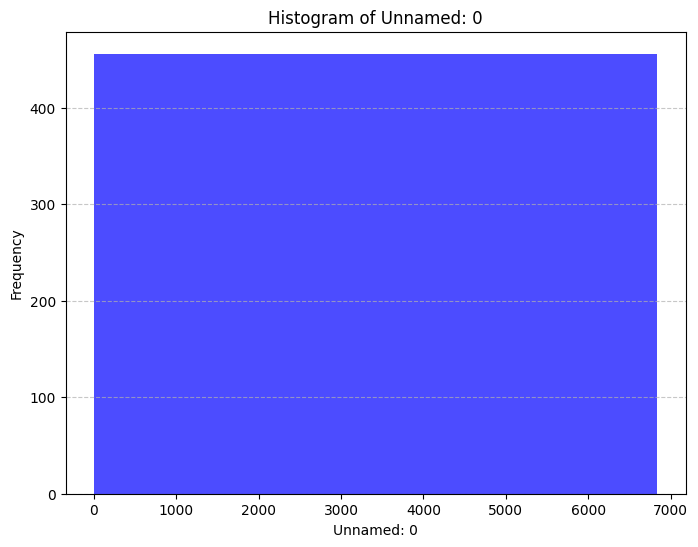

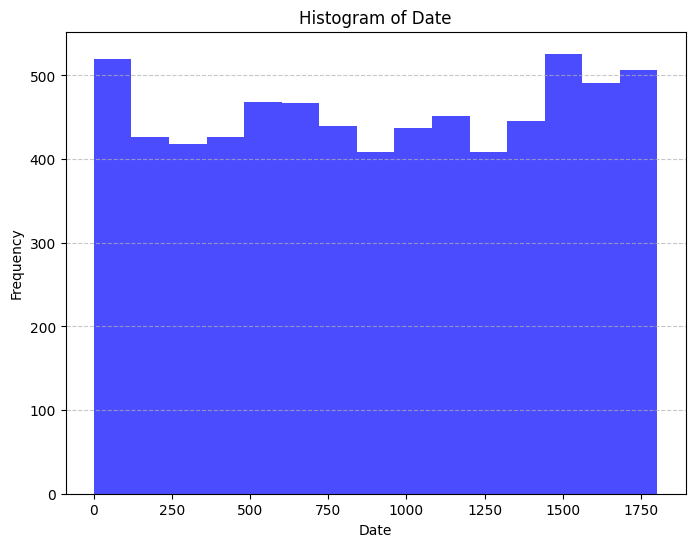

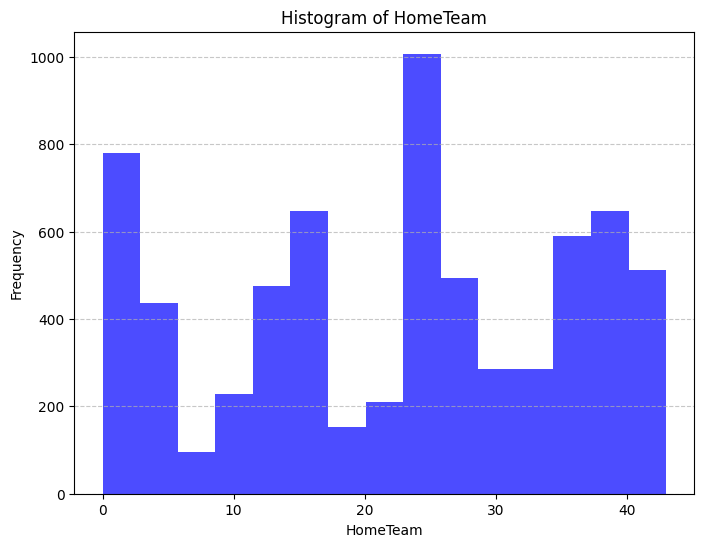

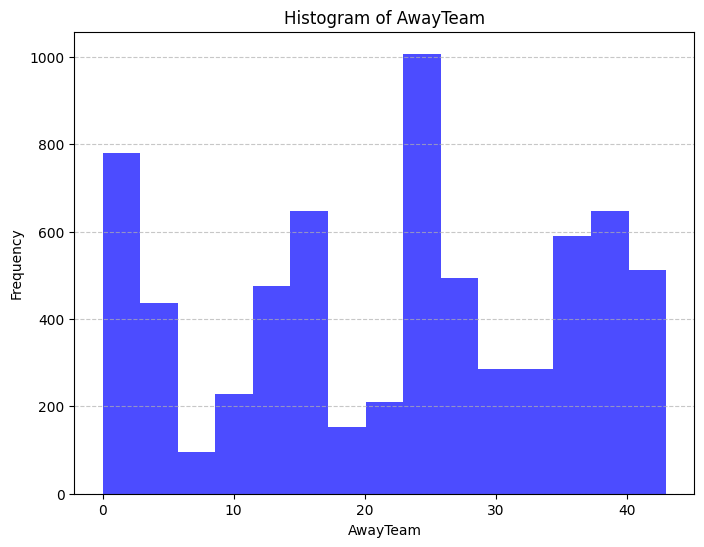

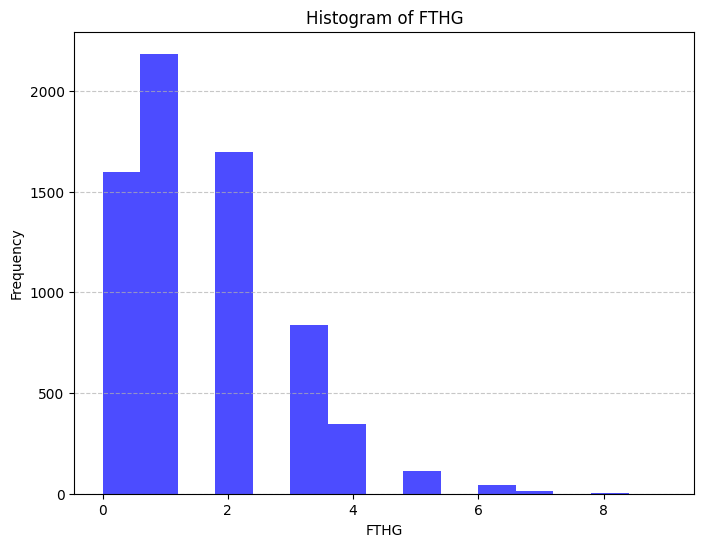

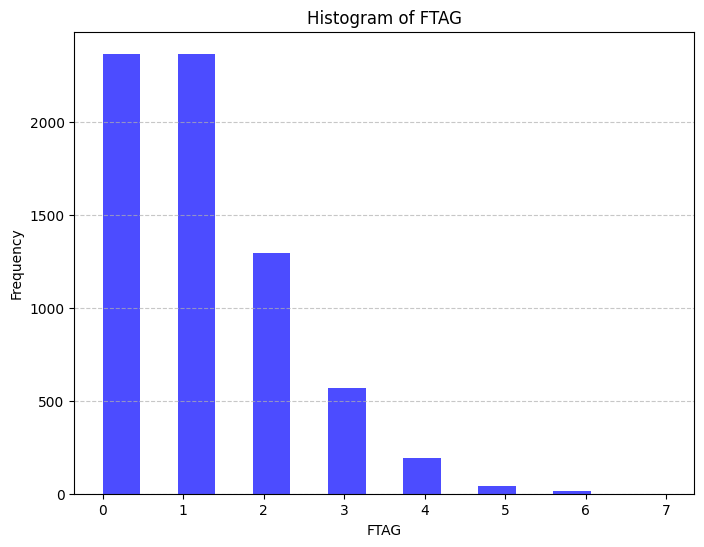

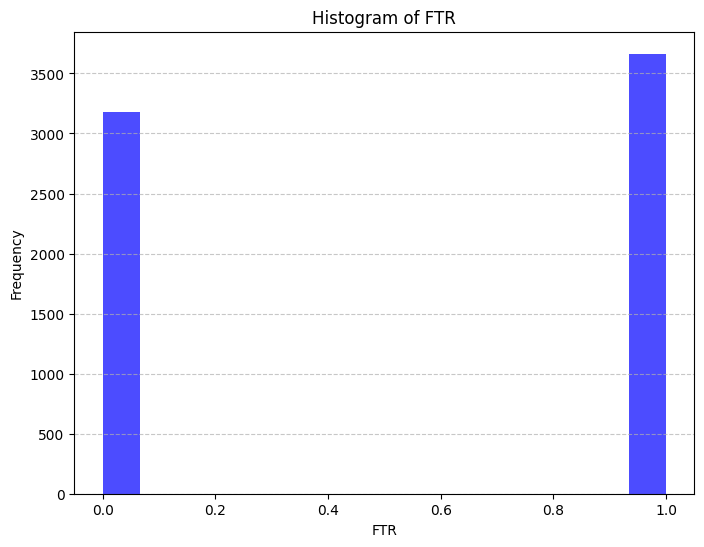

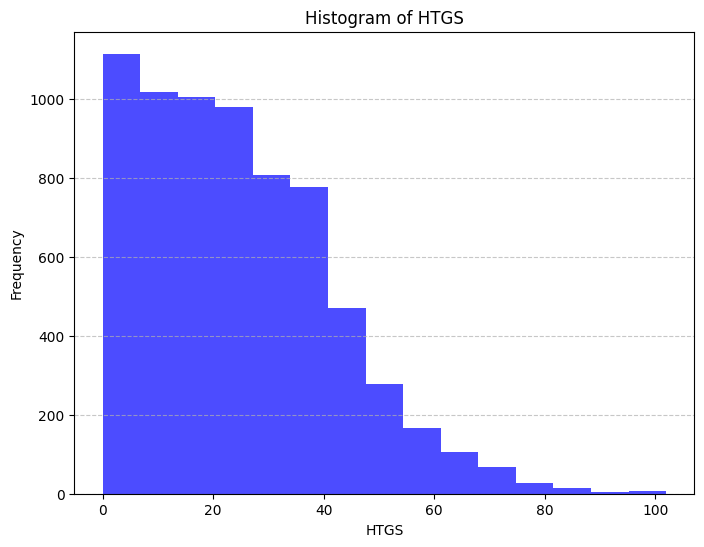

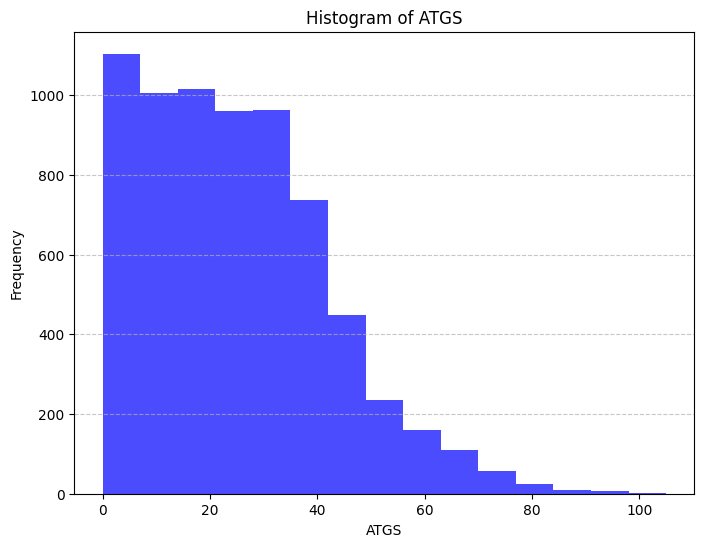

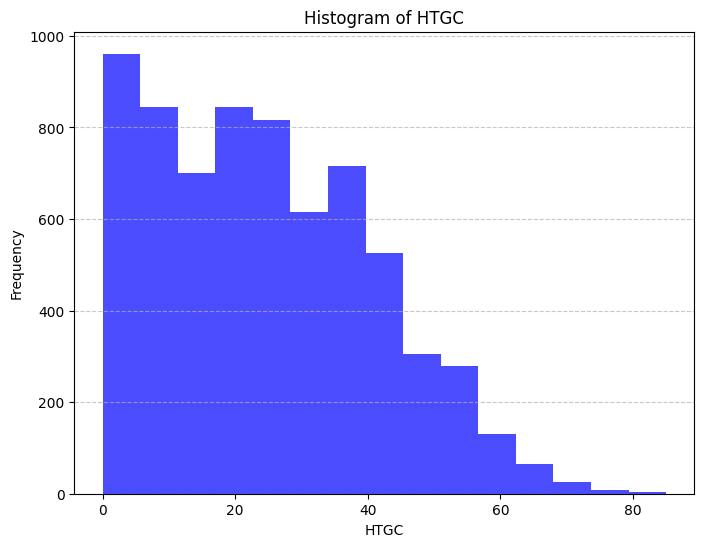

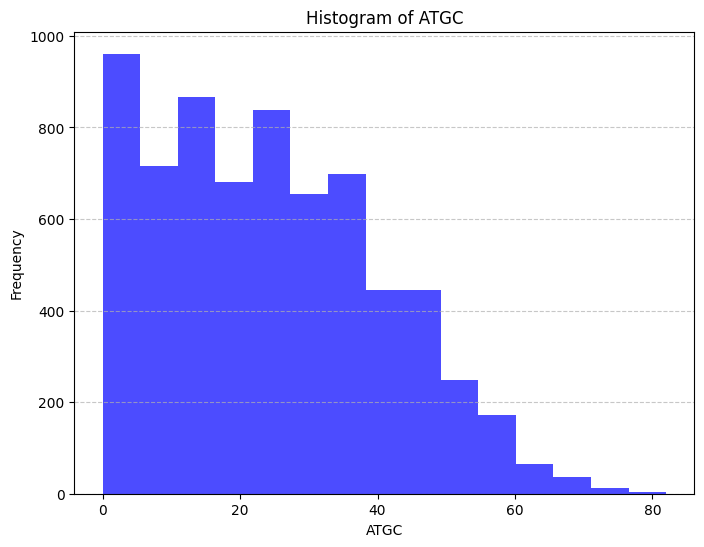

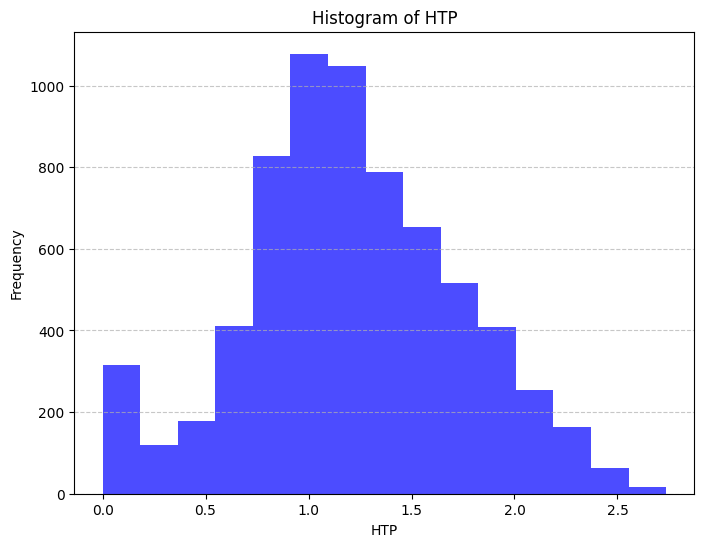

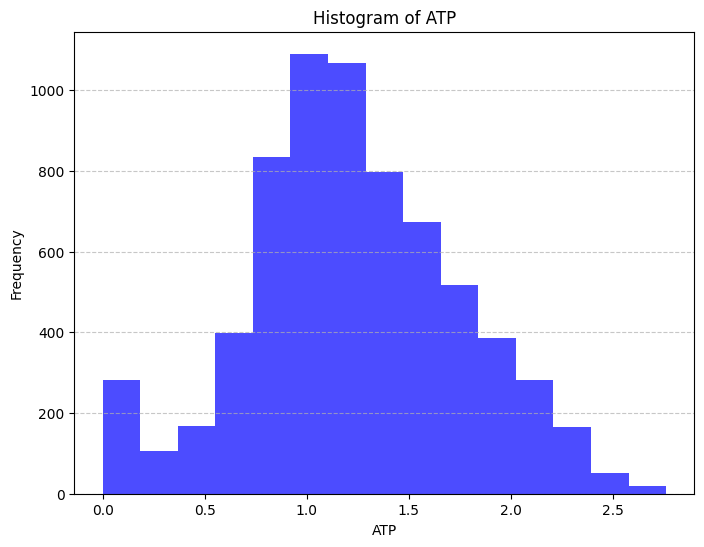

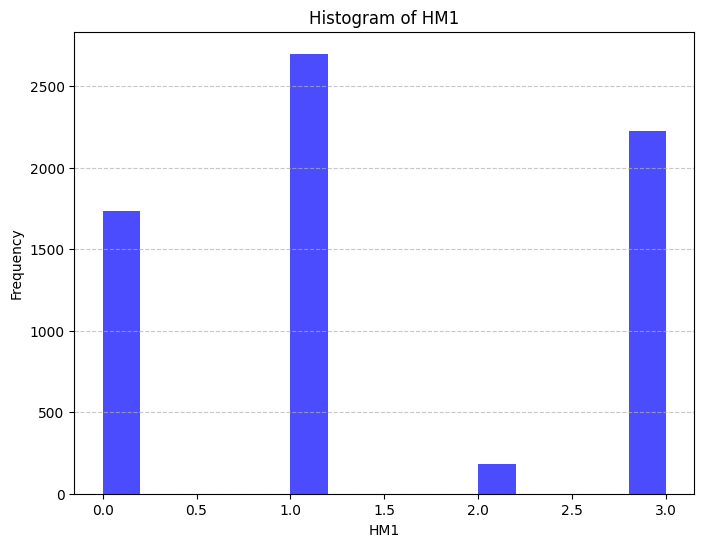

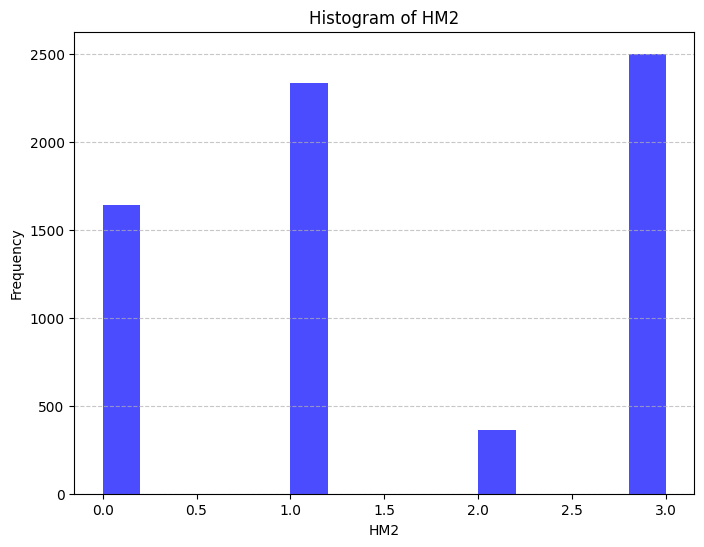

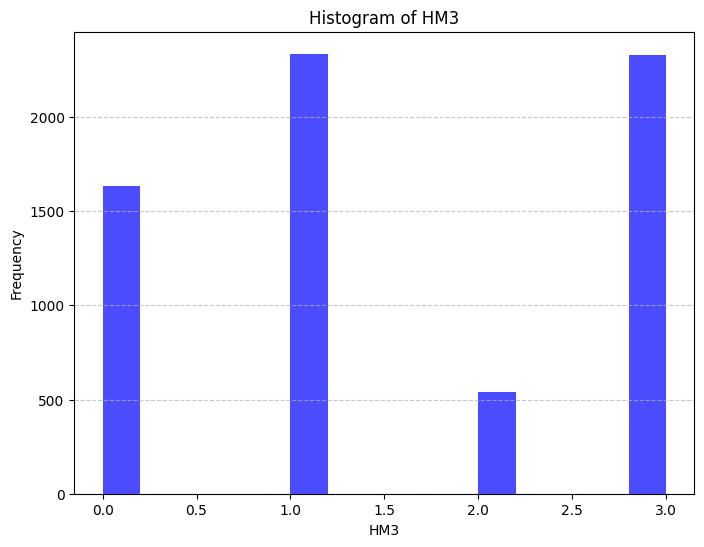

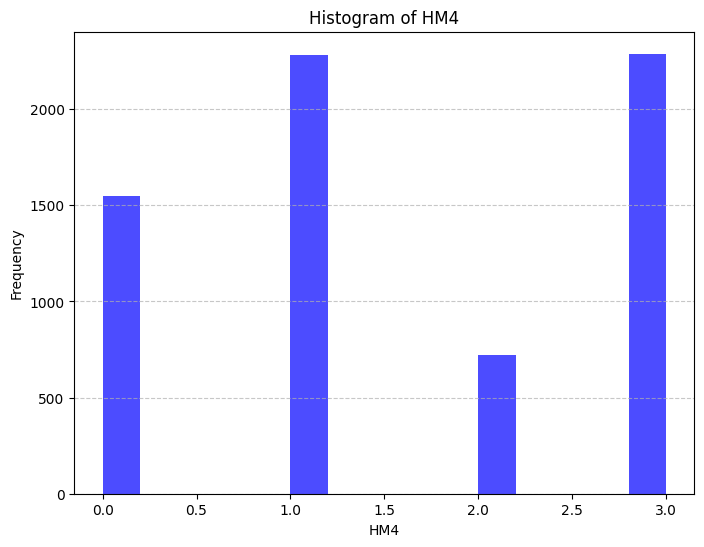

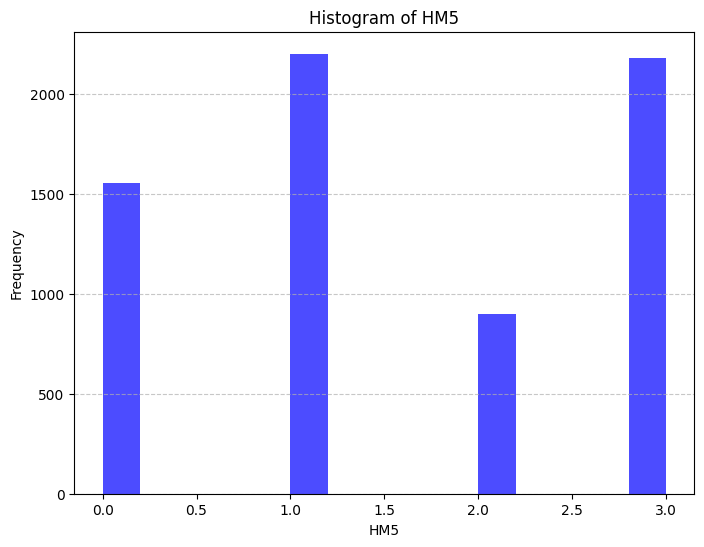

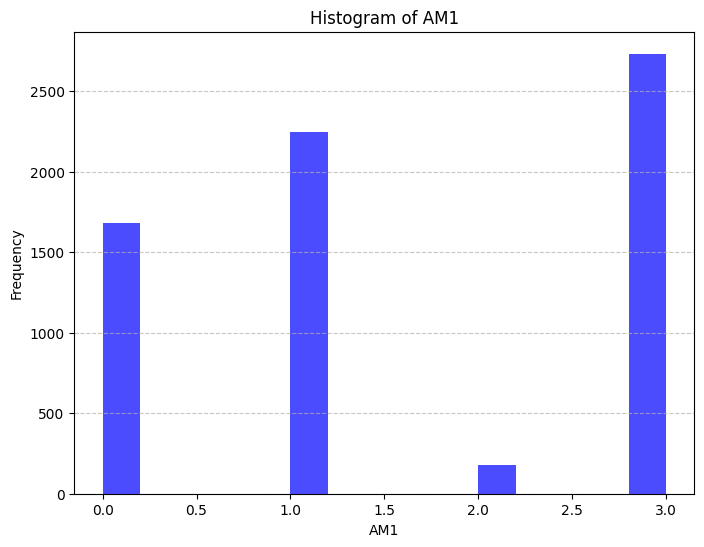

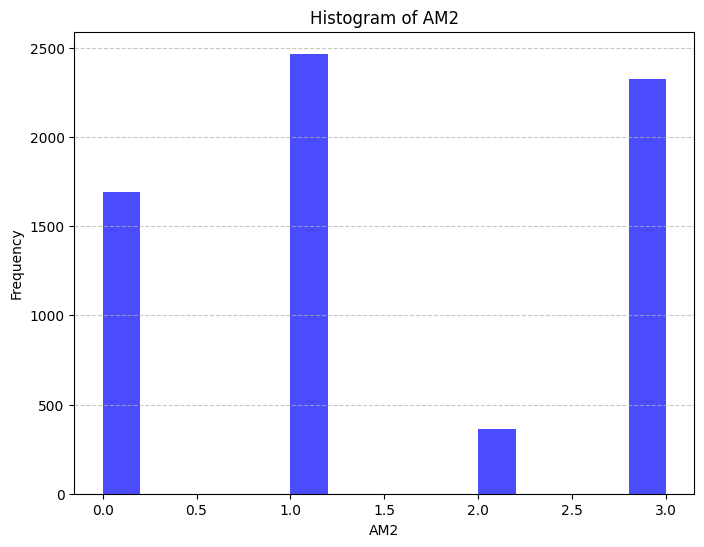

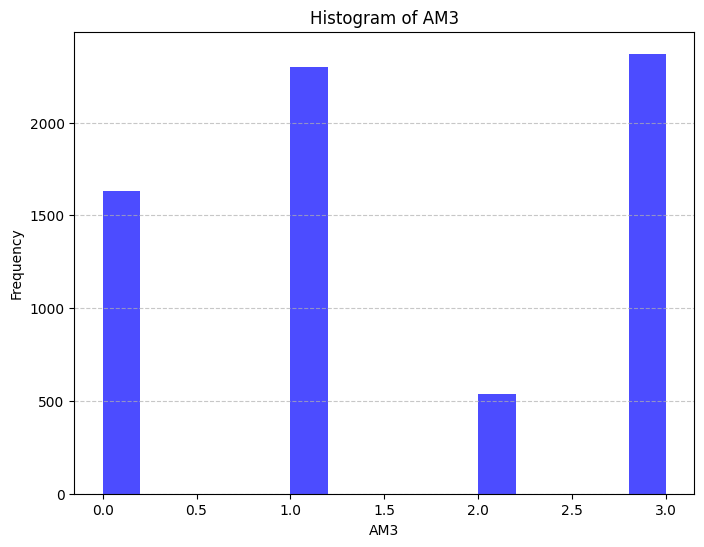

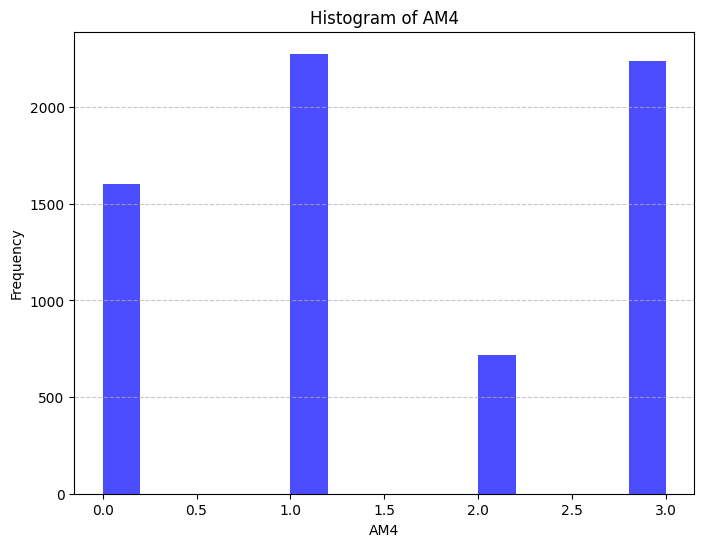

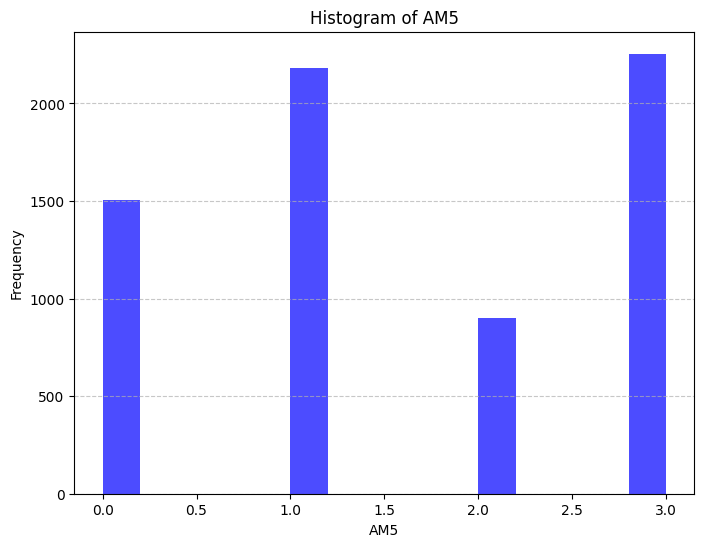

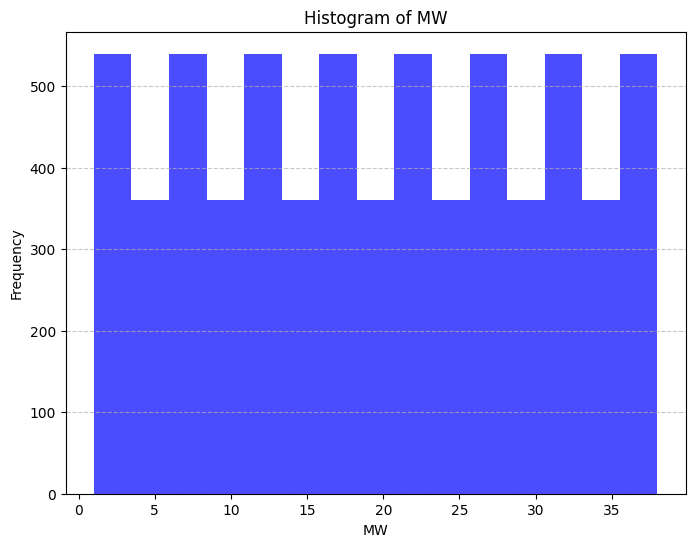

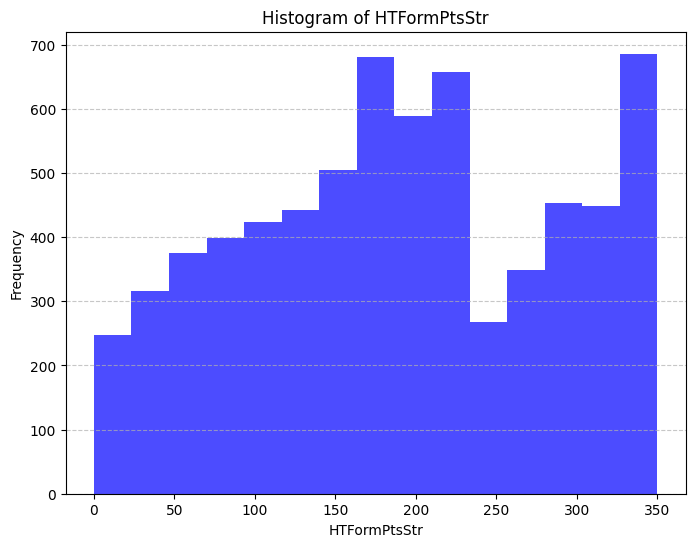

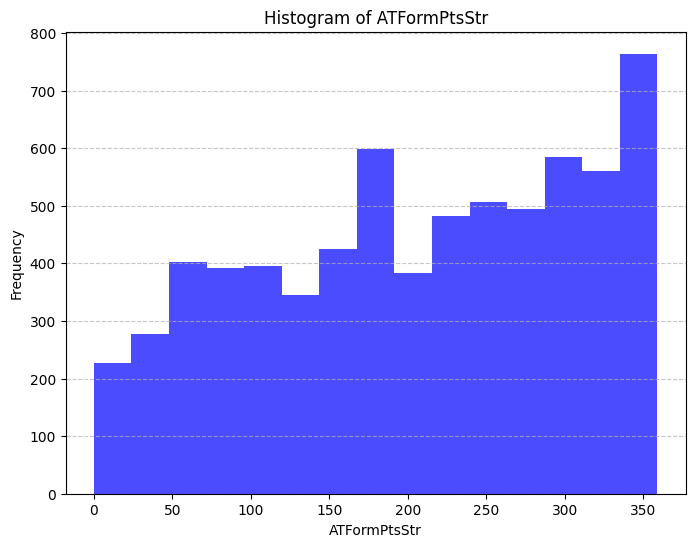

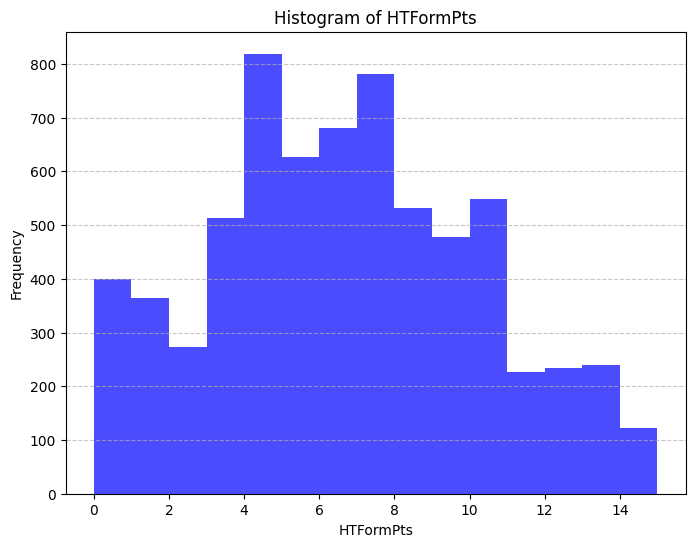

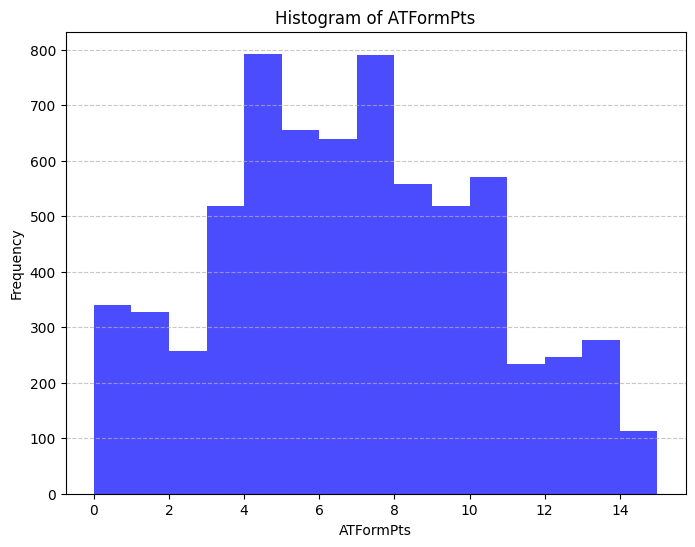

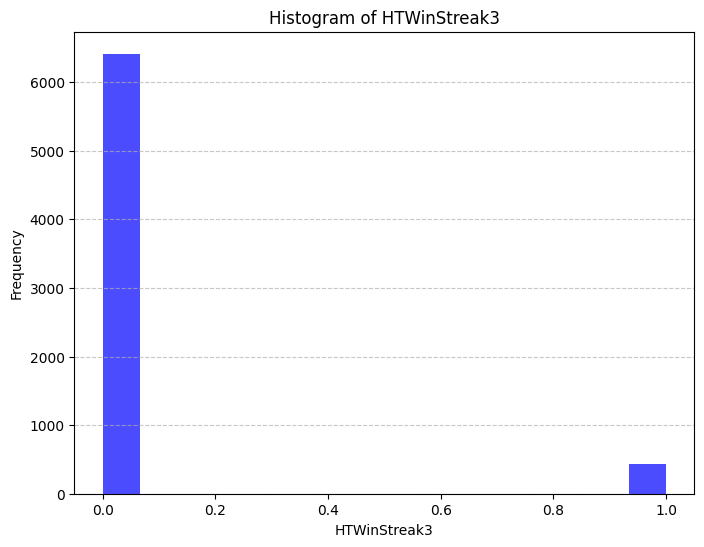

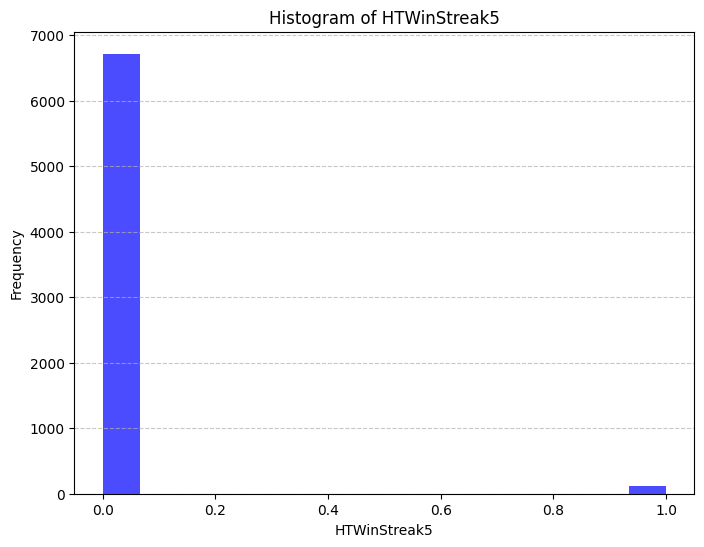

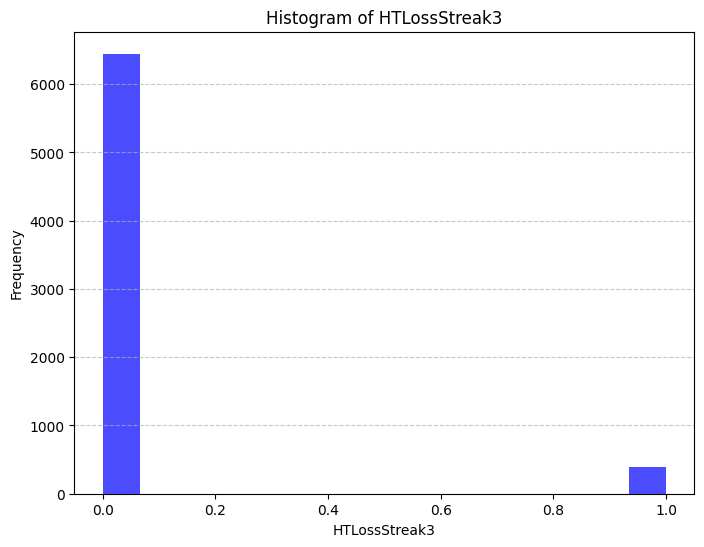

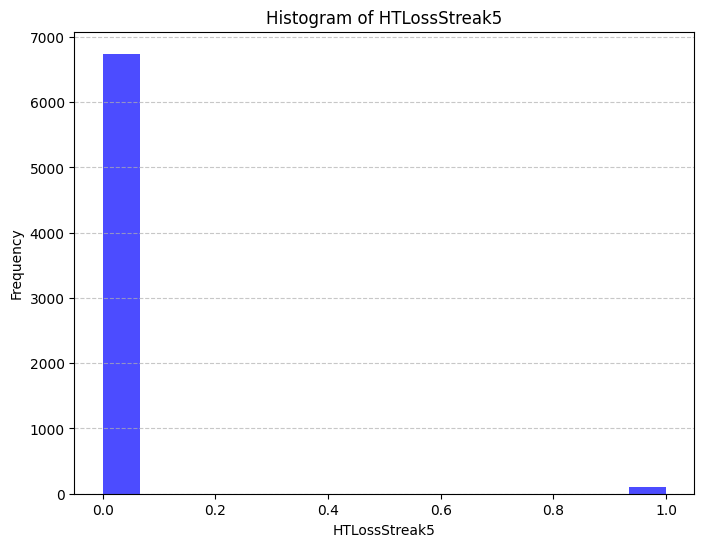

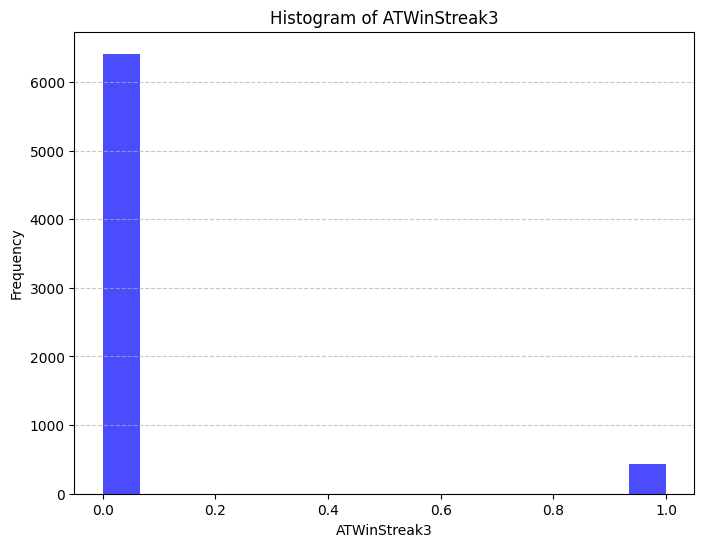

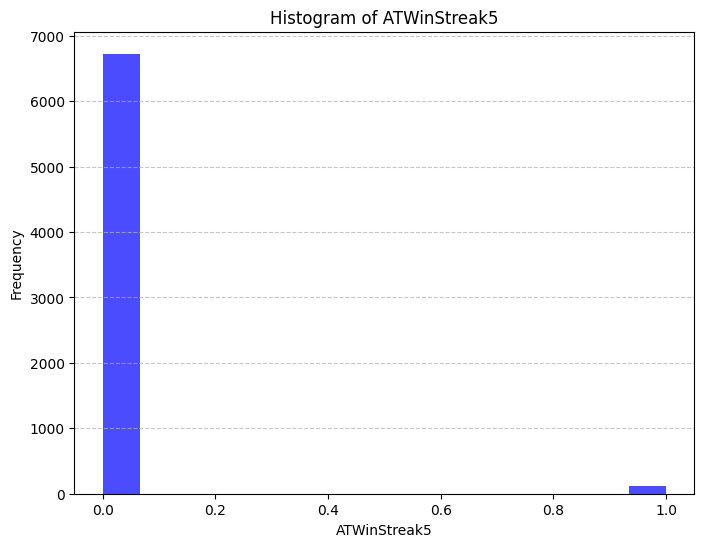

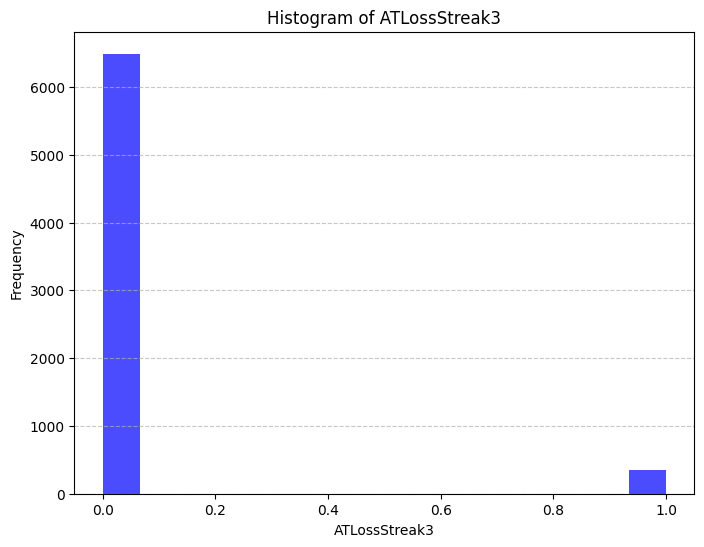

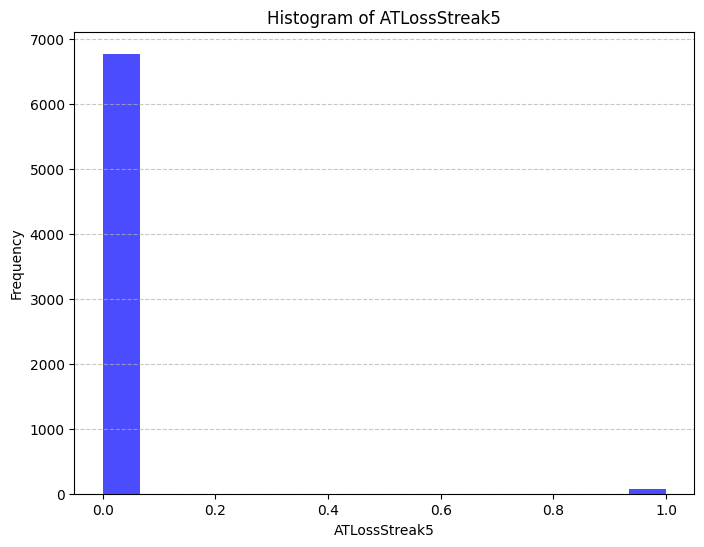

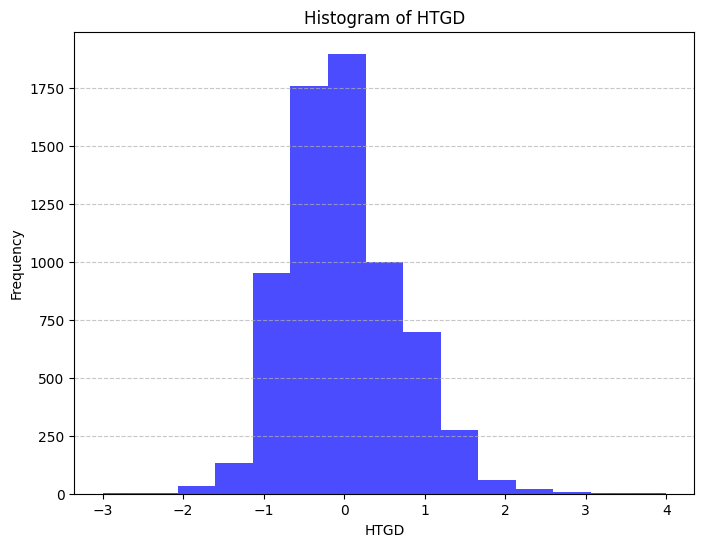

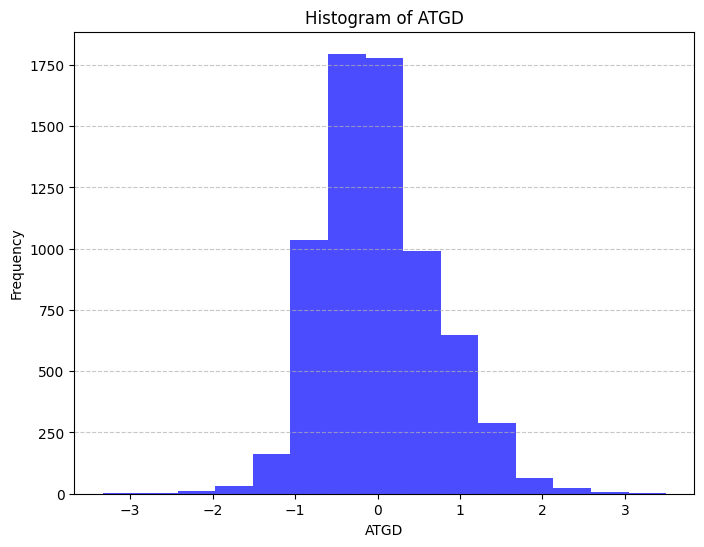

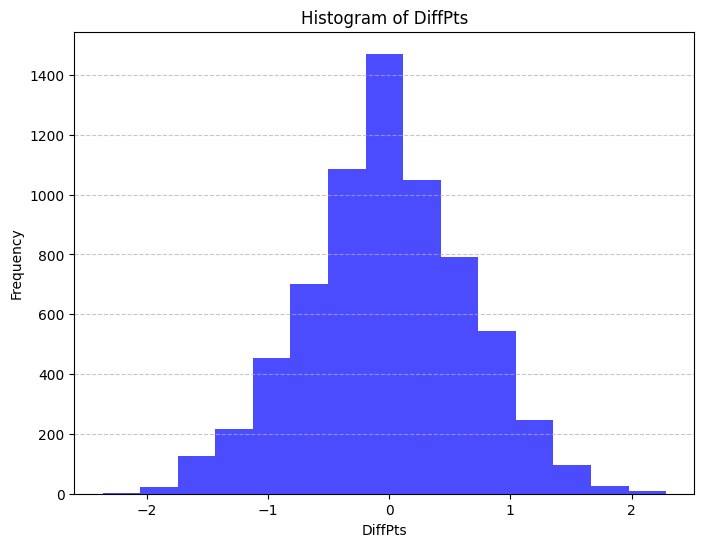

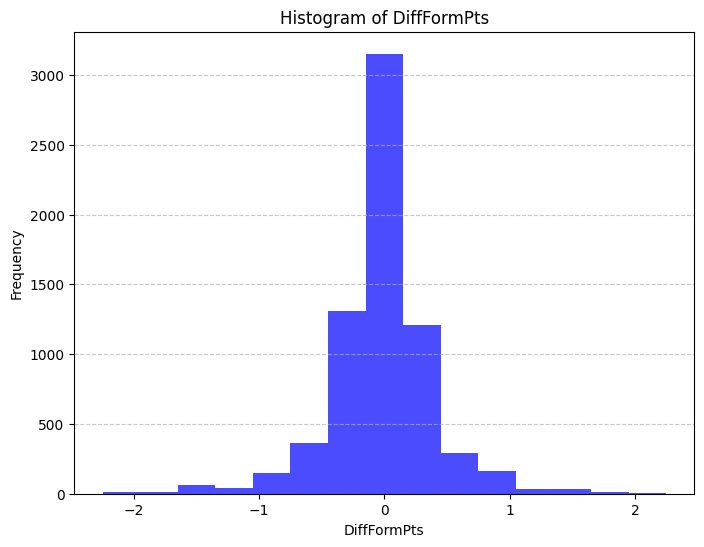

In [19]:
# 10. Distribution of predictor variables
import matplotlib.pyplot as plt

# Identify numeric columns using the 'select_dtypes' method
numeric_columns = df.select_dtypes(include=['number']).columns

# Generate histograms for numeric variables
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=15, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [23]:
# 11.
import numpy as np
import pandas as pd
from scipy import stats  # Import the stats module for Z-score calculation

# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df[numeric_columns]))

# Set a Z-score threshold for outlier removal (e.g., 3 standard deviations)
z_threshold = 3

# Create a mask for rows without outliers
no_outliers_mask = (z_scores < z_threshold).all(axis=1)

# Remove outliers based on the mask
df_no_outliers = df[no_outliers_mask]

# Compare model performance between df and df_no_outliers (optional)
# You can insert your model evaluation code here, depending on your modeling task.

# Print summary statistics to assess the effect of outlier removal (optional)
print("Original DataFrame:")
print(df.describe())
print("\nDataFrame without Outliers:")
print(df_no_outliers.describe())



Original DataFrame:
        Unnamed: 0         Date     HomeTeam     AwayTeam         FTHG  \
count  6840.000000  6840.000000  6840.000000  6840.000000  6840.000000   
mean   3419.500000   913.169006    22.311111    22.311111     1.527485   
std    1974.682253   533.075822    13.163109    13.163109     1.297913   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%    1709.750000   460.750000    12.000000    12.000000     1.000000   
50%    3419.500000   912.000000    24.000000    24.000000     1.000000   
75%    5129.250000  1390.000000    35.000000    35.000000     2.000000   
max    6839.000000  1803.000000    43.000000    43.000000     9.000000   

              FTAG          FTR         HTGS         ATGS         HTGC  ...  \
count  6840.000000  6840.000000  6840.000000  6840.000000  6840.000000  ...   
mean      1.130263     0.535673    24.416667    24.514327    24.497807  ...   
std       1.124566     0.498762    17.178524    17.136894    16.401571  ... 

Original DataFrame:

Count: The number of data points for each column.

Mean: The mean (average) value for each column.

Std: The standard deviation, which measures the spread of data.

Min: The minimum value in each column.

25%: The 25th percentile value, which is the value below which 25% of the data falls.

50%: The median or 50th percentile value, which is the middle value of the data.

75%: The 75th percentile value, which is the value below which 75% of the data falls.

Max: The maximum value in each column.

DataFrame without Outliers:

These statistics are calculated after removing outliers based on Z-scores.

Now, let's interpret the effect of removing outliers:

The count of rows in the "DataFrame without Outliers" is lower, indicating that some rows were removed as outliers.

In most columns, the mean, standard deviation, and other statistics have changed slightly compared to the original DataFrame.
The minimum and maximum values may be different, as some extreme values (outliers) have been removed.

In [25]:
# 12. Data Removal and Imputation


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Example: Removing 1% of data from a column
df_removed = df.copy()


